El análisis del conjunto de datos de predicción de diabetes presenta una valiosa oportunidad para comprender y predecir los factores que contribuyen al desarrollo de esta enfermedad crónica. Este conjunto de datos proporciona información sobre diversos atributos de las personas, como la edad,IMC, genero. niveles de glucosa en la sangre entre otros.

La motivación detrás de este análisis radica en la necesidad de identificar patrones y relaciones entre estas variables con el fin de desarrollar mejores estrategias de prevención y tratamiento de la diabetes. Al comprender los factores de riesgo, como la hipertensión, el IMC (BMI) y los niveles de glucosa, podemos mejorar la detección temprana y personalizar la atención médica para aquellos en riesgo.

Este análisis beneficiará a una amplia audiencia, incluyendo profesionales de la salud, investigadores, expertos en salud pública y responsables de la formulación de políticas. Los profesionales de la salud podrán utilizar los resultados para mejorar el asesoramiento y la educación de los pacientes, así como para identificar grupos de alto riesgo que requieran intervenciones específicas. Los investigadores podrán aprovechar los hallazgos para desarrollar modelos de predicción más precisos y guiar investigaciones futuras sobre los factores subyacentes a la diabetes. Los responsables de la formulación de políticas y expertos en salud pública podrán utilizar los resultados para diseñar programas de prevención y promoción de la salud dirigidos a la población en general.

En resumen, el análisis de este conjunto de datos sobre predicción de diabetes tiene como objetivo proporcionar conocimientos clave sobre los factores de riesgo y las características asociadas a esta enfermedad, con el fin de mejorar la prevención, el diagnóstico y el tratamiento, y así beneficiar a profesionales de la salud, investigadores y responsables de la formulación de políticas en el campo de la diabetes y la salud pública en general.

Funte de datos original : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

Descripción de variables:
 
| Variable | Descripción |
|-----------|-----------|
| gender   | Genero   |
| age   | Edad   |
| heart_disease   | Ha padesido de un infarto   |
| smoking_history   | Historial fumador   |
| bmi   | Indice de masa corporal   |
| HbA1c_level   | Nivel de hemoblogina en la sangre   |
| blood_glucose_level   | Nivel de glucosa en la sangre   |
| diabetes   | Tiene diabetes   |

A continuación, prepararemos nuestro ambiente de trabajo: importaremos las librerías necesarias para nuestro análisis y cargaremos los datos

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

df = pd.read_csv("diabetes.csv", delimiter = ',')
print(f"Observaciones : {df.shape[0]:,}")
print(f"Columnas      : {df.shape[1]}")
df.head()

Observaciones : 100,000
Columnas      : 9


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [40]:
# estadísticos descriptivos para nuestros datos
df.describe().round(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.08
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


Notamos que no hay una diferencia representativa que indique la presenia de outliers en nuestras variables

In [5]:
# valores perdidos: notar que no hay valores perdidos
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

A continuación realizaremos una importación desde una API con el objetivo de obtener información que nos pueda ser de utilidad

In [31]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(healthdata.nj.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("bxq8-mugm", limit=2000)

# Convert to pandas DataFrame
api = pd.DataFrame.from_records(results)
api.head()

,jurisdiction_of_occurrence,year,month,all_cause,natural_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,...,other_diseases_of_respiratory,nephritis_nephrotic_syndrom,symptoms_signs_and_abnormal,diseases_of_heart,cerebrovascular_diseases,accidents_unintentional,motor_vehicle_accidents,intentional_self_harm_suicide,assault_homicide,drug_overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659


In [32]:
# Lista de columnas que deseas convertir a enteros
columnas_a_convertir = ['all_cause', 'diabetes_mellitus','natural_cause','septicemia','malignant_neoplasms','alzheimer_disease','influenza_and_pneumonia','chronic_lower_respiratory','other_diseases_of_respiratory','nephritis_nephrotic_syndrom','symptoms_signs_and_abnormal','diseases_of_heart','cerebrovascular_diseases','accidents_unintentional','motor_vehicle_accidents','intentional_self_harm_suicide','assault_homicide','drug_overdose']

# Convertir las columnas a enteros utilizando un bucle
for columna in columnas_a_convertir:
    api[columna] = api[columna].astype(int)

# Imprimir el DataFrame con las columnas convertidas a enteros
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiction_of_occurrence     72 non-null     object
 1   year                           72 non-null     object
 2   month                          72 non-null     object
 3   all_cause                      72 non-null     int32 
 4   natural_cause                  72 non-null     int32 
 5   septicemia                     72 non-null     int32 
 6   malignant_neoplasms            72 non-null     int32 
 7   diabetes_mellitus              72 non-null     int32 
 8   alzheimer_disease              72 non-null     int32 
 9   influenza_and_pneumonia        72 non-null     int32 
 10  chronic_lower_respiratory      72 non-null     int32 
 11  other_diseases_of_respiratory  72 non-null     int32 
 12  nephritis_nephrotic_syndrom    72 non-null     int32 
 13  symptom

Transformamos nuestras columnas a enteros para poder realizar la suma por año

In [33]:
api_suma_anual = api.groupby('year', as_index=False).sum(numeric_only=True)
api_suma_anual

,year,all_cause,natural_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,chronic_lower_respiratory,other_diseases_of_respiratory,nephritis_nephrotic_syndrom,symptoms_signs_and_abnormal,diseases_of_heart,cerebrovascular_diseases,accidents_unintentional,motor_vehicle_accidents,intentional_self_harm_suicide,assault_homicide,drug_overdose
0,2014,2626418,2424126,38940,591700,76488,93541,55227,147101,36187,48146,32242,614348,133103,135928,35398,42826,15872,47055
1,2015,2712630,2495936,40773,595930,79535,110561,57062,155041,38286,49959,32042,633842,140323,146571,37757,44193,17793,52404
2,2016,2744248,2509054,40613,598038,80058,116103,51537,154596,39224,50046,33373,635260,142142,161374,40327,44965,19362,63632
3,2017,2813503,2566005,40922,599108,83564,121404,55672,160201,41693,50633,32750,647457,146383,169936,40231,47173,19510,70237
4,2018,2839205,2594018,40718,599274,84946,122019,59120,159486,43814,51386,32537,655381,147810,167127,39404,48344,18830,67367
5,2019,2854838,2603461,38431,599601,87647,121499,49783,156979,44112,51565,32408,659041,150005,173040,39107,47511,19141,70630


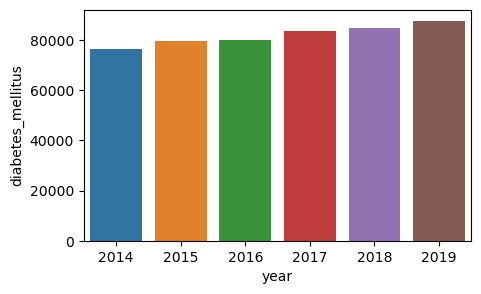

In [54]:
# Ajustar la salida de gráficos para Jupyter Notebook
%matplotlib inline

# Crear una nueva figura y ajustar el tamaño según tus preferencias
plt.figure(figsize=(5, 3))  # Ajusta el tamaño según tus necesidades

# Tramar el gráfico de barras
sns.barplot(x="year", y="diabetes_mellitus", data=api_suma_anual)

# Mostrar el gráfico
plt.show()

Segun los datos de la API nos damos cuenta que los casos de diabetes en EEUU van en aumento año a año

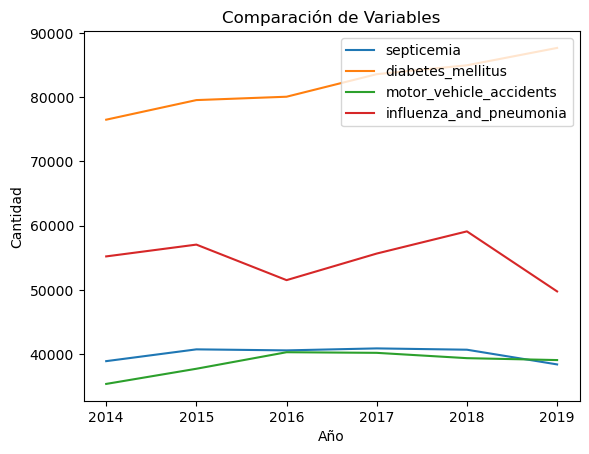

In [37]:
# Variables a comparar en el gráfico de líneas
variables = ['septicemia', 'diabetes_mellitus','motor_vehicle_accidents','influenza_and_pneumonia']

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Iterar sobre las variables y trazar cada una en el gráfico
for variable in variables:
    ax.plot(api_suma_anual['year'], api_suma_anual[variable], label=variable)

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación de Variables')

# Mostrar una leyenda con las etiquetas de las variables
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

 Se observa segun los datos obtenidos de la API, que la diabetes causa mas muertes al año en EEUU que
 
 
 A continuación realizaremos un análisis exploratorio de los datos con el objetivo de identificar si existen tendencias, anomalías o patrones que nos puedan ayudar a entender mejor los datos:

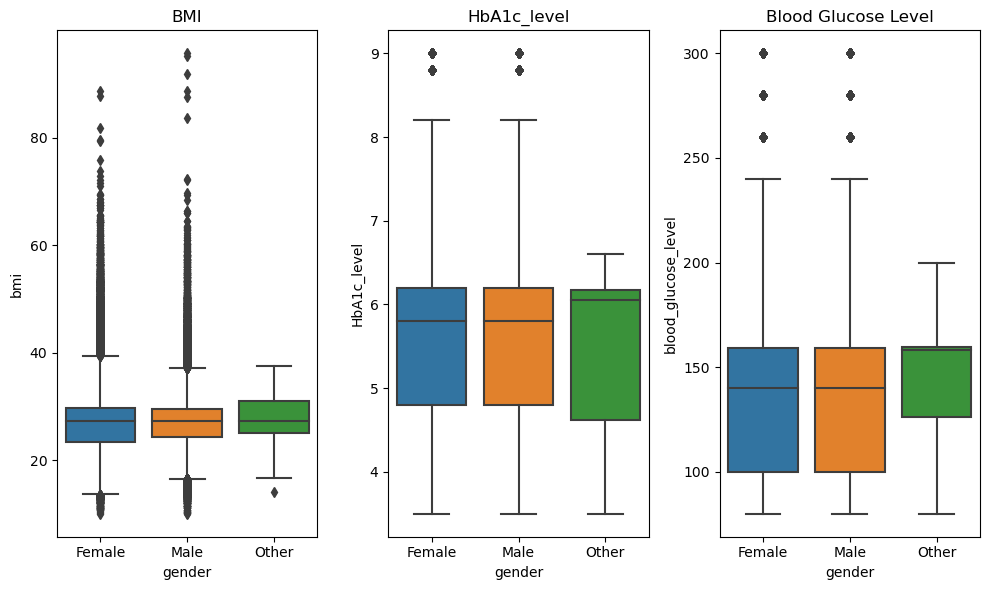

In [33]:
# Graficar los diagramas de caja
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c_level')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level')

plt.tight_layout()
plt.show()

Notamos que nuestra variable bmi posee outliers a considerar

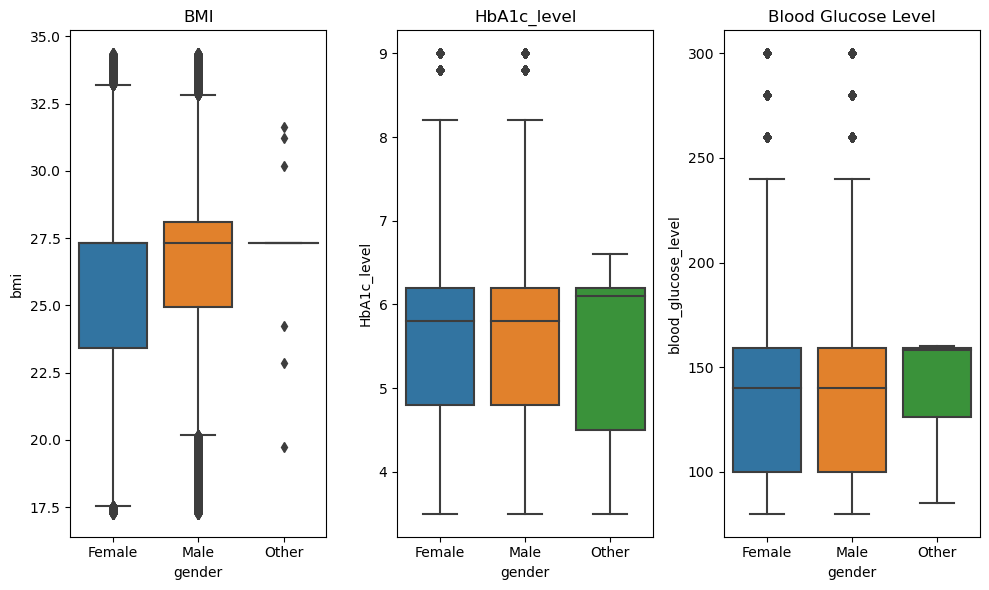

In [45]:
# Calcular Q1 y Q3
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos y eliminar los outliers de la variable BMI
df = df[(df['bmi'] >= limite_inferior) & (df['bmi'] <= limite_superior)]

# Ver los datos resultantes sin los outliers

# Graficar los diagramas de caja
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c_level')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level')

plt.tight_layout()
plt.show()

eliminamos los outliers de nuestra variable BMI con IQR

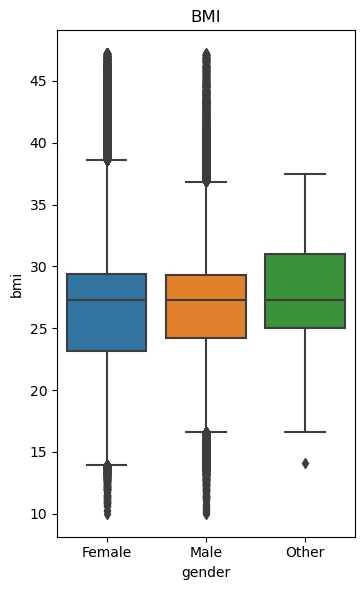

In [27]:
# Graficar los diagramas de caja
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI')

plt.tight_layout()
plt.show()



Usando z score eliminamos outliers de nuestra variable BMI

In [149]:
df[['diabetes']].value_counts() 

diabetes
0           91500
1            8500
dtype: int64

notamos que hay una diferencia a considerar entre la cantidad de personas con diabetes y la cantidad de personas sin diabetes, en este caso lo dejaremos asi porque es muy probable que realmente asi sea el recuento de personas con diabetes al momento de tomar los datos.

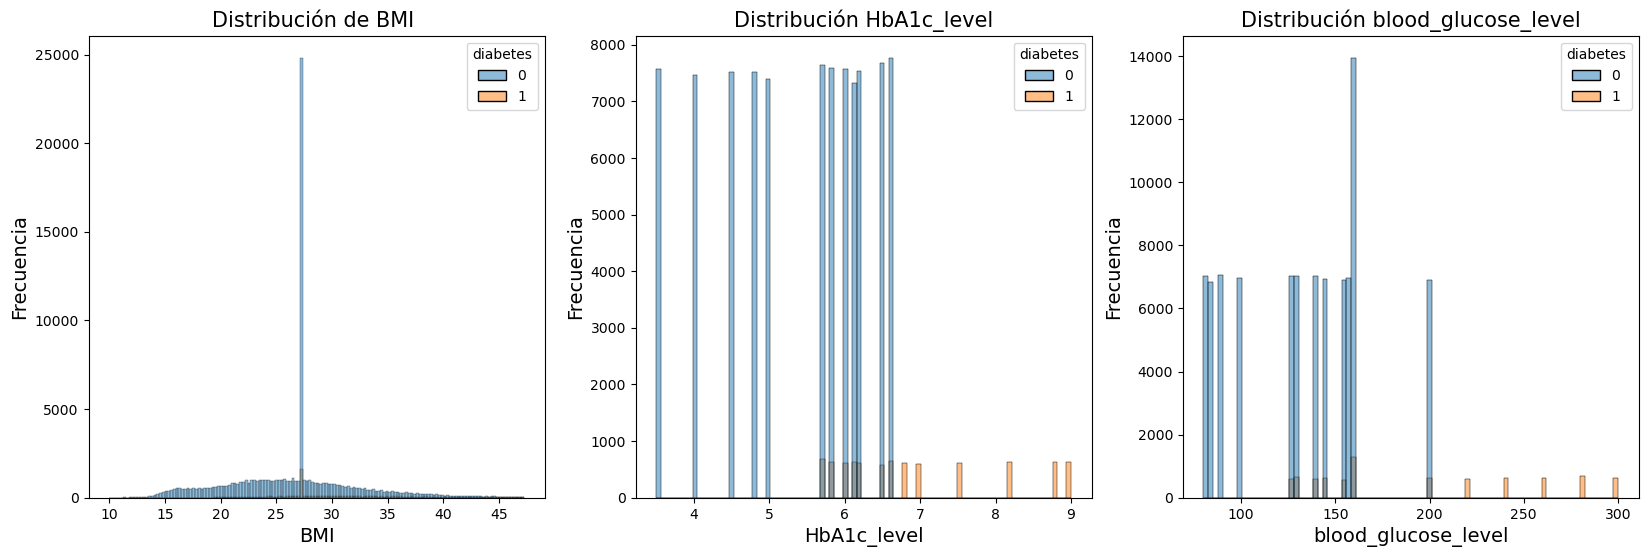

In [15]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
# distribucion para BMI
ax = sns.histplot(data=df, x="bmi", hue="diabetes", ax=axes[0])
ax.set_title('Distribución de BMI ',fontsize=15)
ax.set_ylabel('Frecuencia',fontsize=14)
ax.set_xlabel('BMI',fontsize=14)
# distribucion para HbA1c_level
ax = sns.histplot(data=df, x="HbA1c_level", hue="diabetes", ax=axes[1])
ax.set_title('Distribución HbA1c_level',fontsize=15)
ax.set_ylabel('Frecuencia',fontsize=14)
ax.set_xlabel('HbA1c_level',fontsize=14);
# distribucion para blood_glucose_level
ax = sns.histplot(data=df, x="blood_glucose_level", hue="diabetes", ax=axes[2])
ax.set_title('Distribución blood_glucose_level',fontsize=15)
ax.set_ylabel('Frecuencia',fontsize=14)
ax.set_xlabel('blood_glucose_level',fontsize=14);


In [ ]:
Observamos que a mayor indice glicemico es mayor la posibilidad de tener diabaetes, al igual que un elevado nivel de glucosa en la sangre.

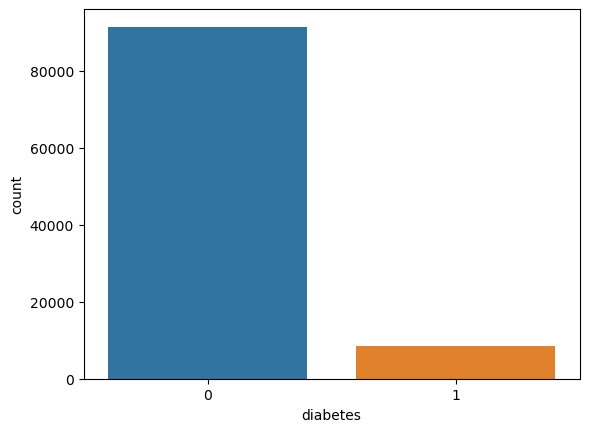

In [35]:
# Cantidad de personas con Diabetes
sns.countplot(df, x = "diabetes");

In [55]:
# Contar la cantidad de personas con y sin diabetes separadas por género
diabetes_counts = df.groupby(['gender', 'diabetes']).size().unstack()

# Mostrar los resultados
print(diabetes_counts)

diabetes        0       1
gender                   
Female    44832.0  2863.0
Male      31468.0  2998.0
Other        13.0     NaN


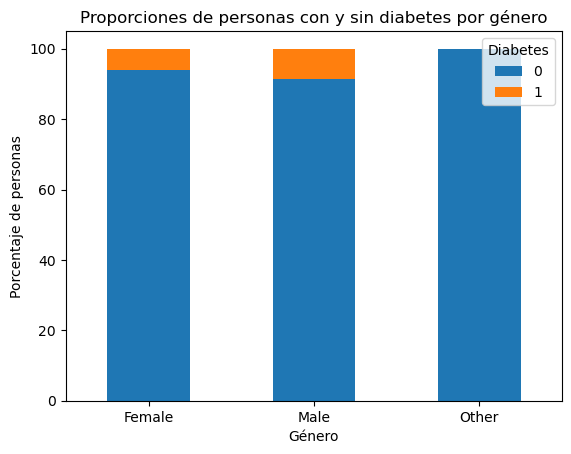

In [56]:
#¿Existe una relación entre el género y la diabetes ?

# Calcular las proporciones en porcentaje
diabetes_percentages = diabetes_counts.div(diabetes_counts.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
diabetes_percentages.plot(kind='bar', stacked=True)

# Configurar los detalles del gráfico
plt.xlabel('Género')
plt.ylabel('Porcentaje de personas')
plt.title('Proporciones de personas con y sin diabetes por género')
plt.legend(title='Diabetes', loc='upper right')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

Se observa que la frecuencia de diabetes es mayor en personas del genero masculino que en el generp femenino.

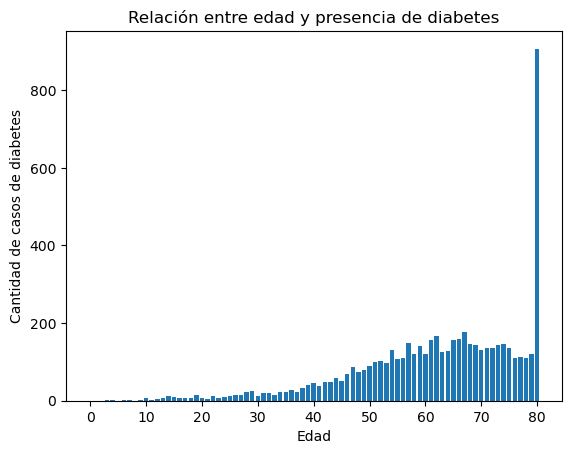

In [57]:
#¿Hay una asociación entre la edad y la presencia de diabetes?

# Agrupamos los datos por edad y contamos la cantidad de casos de diabetes en cada grupo
grouped_data = df.groupby('age')['diabetes'].sum()

# Graficamos la cantidad de casos de diabetes por edad utilizando un gráfico de barras
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Edad')
plt.ylabel('Cantidad de casos de diabetes')
plt.title('Relación entre edad y presencia de diabetes')
plt.show()

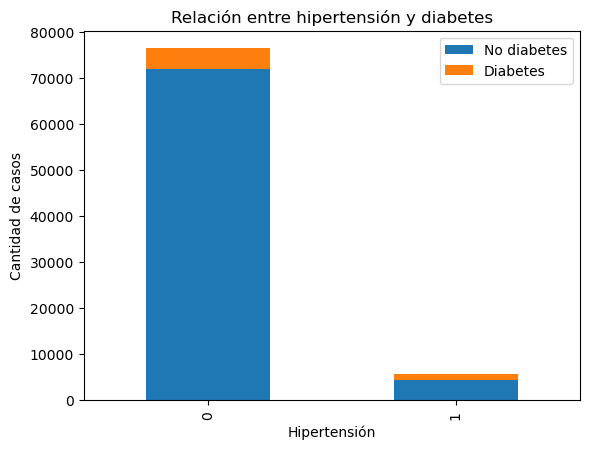

Coeficiente de correlación de Pearson: 0.18070691724624188


In [60]:
#¿La hipertensión está relacionada con la existencia de diabetes en el grupo objetivo?

# Agrupamos los datos buscando la combinación de hipertensión y diabetes y cuentamos la cantidad de casos en cada combinación
grouped_data = df.groupby(['hypertension', 'diabetes']).size().unstack()

# Graficamos la relación entre hipertensión y diabetes utilizando un gráfico de barras apiladas
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Hipertensión')
plt.ylabel('Cantidad de casos')
plt.title('Relación entre hipertensión y diabetes')
plt.legend(['No diabetes', 'Diabetes'])
plt.show()

# Calcula el coeficiente de correlación de Pearson entre la hipertensión y la diabetes
correlation = df['hypertension'].corr(df['diabetes'])

print("Coeficiente de correlación de Pearson:", correlation)

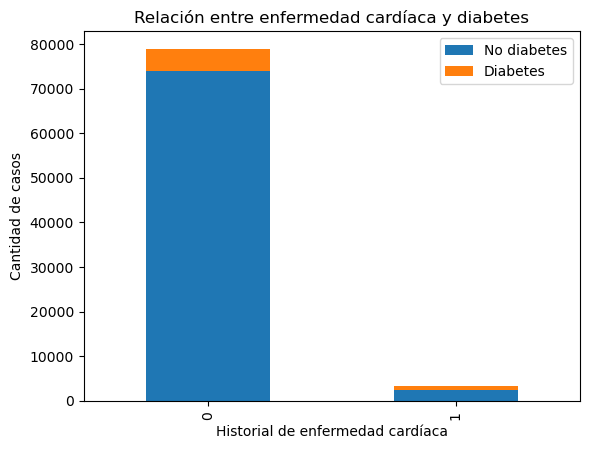

Coeficiente de correlación de Pearson: 0.16995392476227422


In [61]:
# Agrupamos los datos por la combinación de enfermedad cardíaca y diabetes y cuentamos la cantidad de casos en cada combinación
grouped_data = df.groupby(['heart_disease', 'diabetes']).size().unstack()

# Graficamos la relación entre el historial de enfermedad cardíaca y la diabetes utilizando un gráfico de barras agrupadas
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Historial de enfermedad cardíaca')
plt.ylabel('Cantidad de casos')
plt.title('Relación entre enfermedad cardíaca y diabetes')
plt.legend(['No diabetes', 'Diabetes'])
plt.show()

correlation = df['heart_disease'].corr(df['diabetes'])

print("Coeficiente de correlación de Pearson:", correlation)

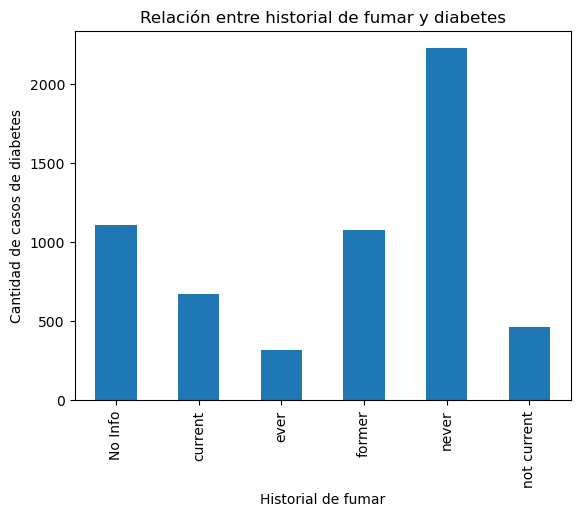

In [62]:
#¿Existe una correlación entre el historial de fumar y la presencia de diabetes?

# Agrupa los datos por el historial de fumar y cuenta la cantidad de casos de diabetes en cada categoría
grouped_data = df.groupby('smoking_history')['diabetes'].sum()

# Grafica la relación entre el historial de fumar y la presencia de diabetes utilizando un gráfico de barras o de conteo
grouped_data.plot(kind='bar')
plt.xlabel('Historial de fumar')
plt.ylabel('Cantidad de casos de diabetes')
plt.title('Relación entre historial de fumar y diabetes')
plt.show()

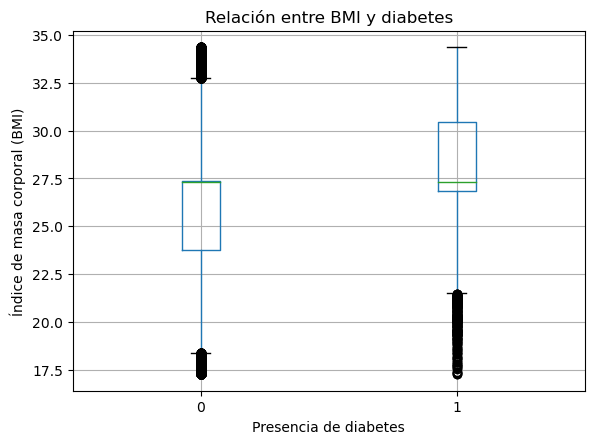

Coeficiente de correlación de Pearson: 0.13107113873205672


In [63]:
# Se Agrupa los datos por la presencia de diabetes y grafica el índice de masa corporal (BMI) utilizando un gráfico de caja y bigotes
df.boxplot(column='bmi', by='diabetes')
plt.xlabel('Presencia de diabetes')
plt.ylabel('Índice de masa corporal (BMI)')
plt.title('Relación entre BMI y diabetes')
plt.suptitle('')
plt.show()

correlation = df['bmi'].corr(df['diabetes'])

print("Coeficiente de correlación de Pearson:", correlation)

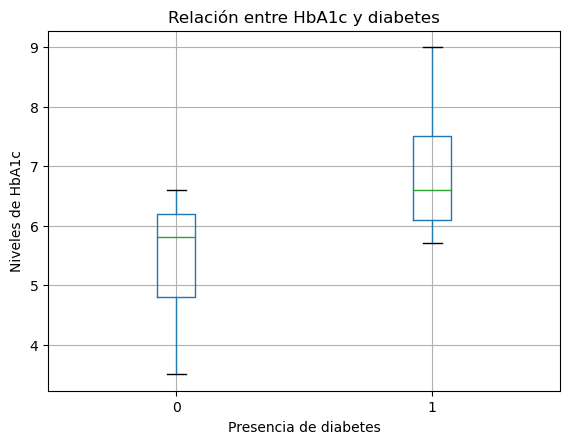

Coeficiente de correlación de Pearson: 0.3742821599898723


In [66]:
#¿Hay alguna relación entre los niveles de hemoglobina glucosilada (HbA1c) y la existencia de diabetes en el grupo objetivo?

df.boxplot(column='HbA1c_level', by='diabetes')
plt.xlabel('Presencia de diabetes')
plt.ylabel('Niveles de HbA1c')
plt.title('Relación entre HbA1c y diabetes')
plt.suptitle('')
plt.show()

correlation = df['HbA1c_level'].corr(df['diabetes'])

print("Coeficiente de correlación de Pearson:", correlation)

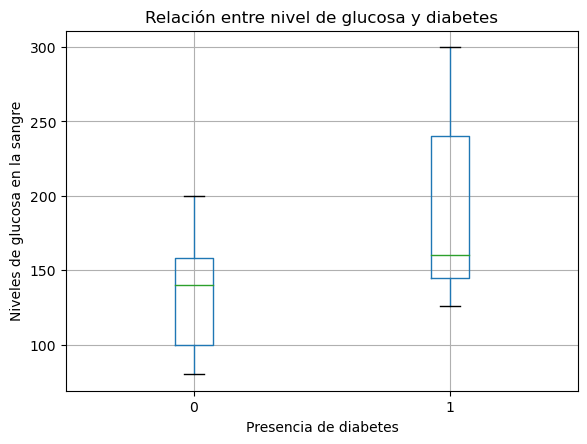

Coeficiente de correlación de Pearson: 0.39597568887705537


In [65]:
#¿Hay alguna relación entre los niveles de hemoglobina glucosilada (HbA1c) y la existencia de diabetes en el grupo objetivo?

df.boxplot(column='blood_glucose_level', by='diabetes')
plt.xlabel('Presencia de diabetes')
plt.ylabel('Niveles de glucosa en la sangre')
plt.title('Relación entre nivel de glucosa y diabetes')
plt.suptitle('')
plt.show()

correlation = df['blood_glucose_level'].corr(df['diabetes'])

print("Coeficiente de correlación de Pearson:", correlation)

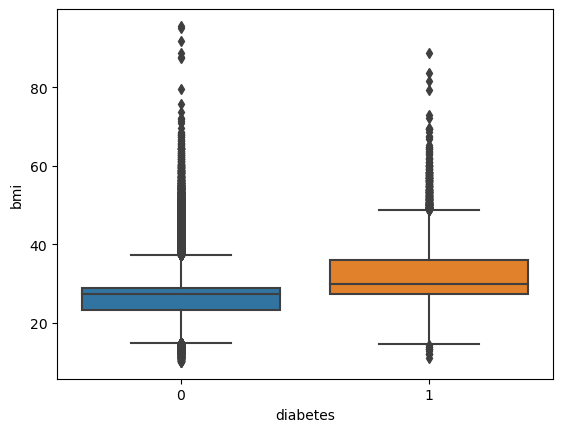

In [49]:
# diabetes por edad
sns.boxplot(df, x = "diabetes", y = "bmi");

Se observa que el imc en personas con diabetes (1) es mayor al imc en personas sin diabetes (0), porm lo que podriamos considerarla como un factor determinante para predecir si un paciente tendra diabetes o no.

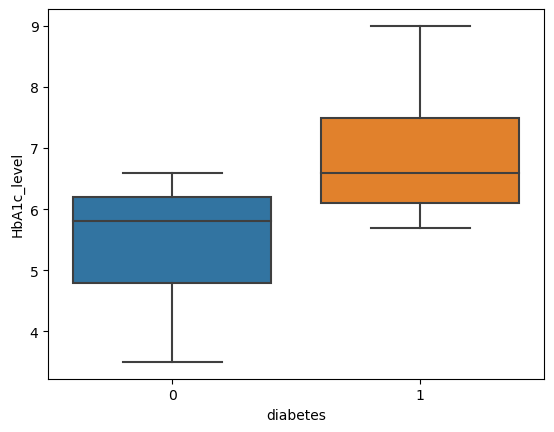

In [54]:
# Es la hemoglobina glicosilada (HbA1c) mas alta en pacientes con diabetes?
sns.boxplot(df, x = "diabetes", y = "HbA1c_level");

Se observa que la hemoglobina glicosilada (HbA1c) en personas con diabetes (1) que en las personas sin diabetes (0).

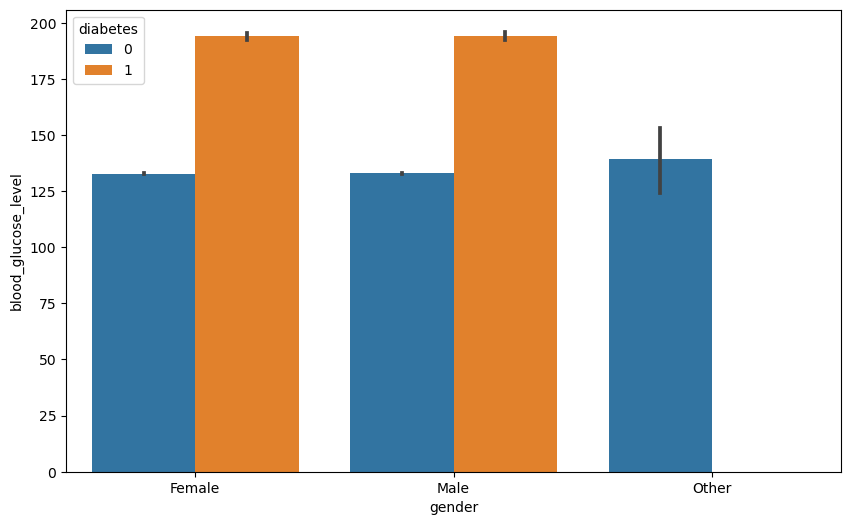

In [50]:
#En que personas es mas alto el nivel de azucar en la sangre
plt.figure(figsize=(10,6))
sns.barplot(y='blood_glucose_level',x='gender',hue='diabetes',data=df);

Segun el diagrama de barras el nivel de azucar en la sangre es mas alto cuando se encuentran con diabetes por lo que tambien es un factor determinante para detectar la diabetes.

In [23]:
# procedemos a instalar pandas profiling 

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [26]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile

C:\Users\Alondra\AppData\Local\Temp\ipykernel_28548\4056194121.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]